## Selective search를 이용하여 Object Detection을 위한 Region Proposal 영역 도출 연습

### Selective Search 란?
- 빠른 Detection과 높은 Recall 예측 성능을 동시에 만족하는 알고리즘
- 컬러, 무늬, 크기, 형태에 따라 유사한 Region을 계층적으로 그룹핑 하는 방법으로 계산
- 최초에는 Pixel Intensity 기반한 graph-based segment 기법에 따라 Over Segmentation을 수행

In [ ]:
# selectivesearch를 설치
!pip install selectivesearch

In [47]:
!mkdir /content/data
# 해당 경로에 내가 Detect할 이미지를 저장

mkdir: cannot create directory ‘/content/data’: File exists


img shape: (1080, 1440, 3)


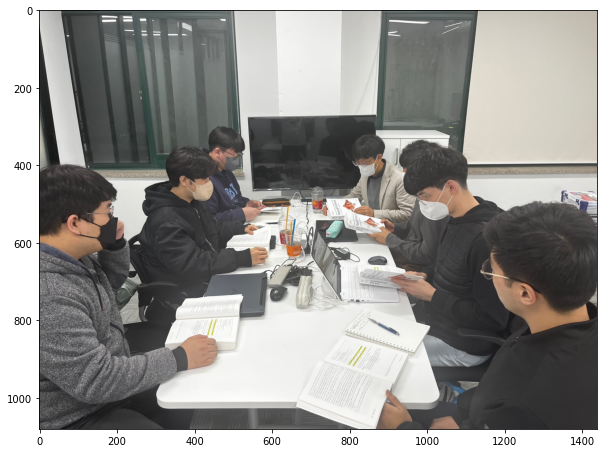

In [48]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

img = cv2.imread('./data/meeting.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.show()

In [49]:
import selectivesearch

# 이미지의 Region Proposal(영역 추정) 정보들 반환
_, regions = selectivesearch.selective_search(img_rgb, scale=200, min_size=3000)
# img_rgb : 우리가 찾아야할 object가 있을만한 공간(대상이미지)
# scale : 크게하면 큰 object 위주로 찾음
# min_size : 적어도 object의 사이즈가 최소 2000 그 이상으로만 찾게 설정

# 후보 영역들 반환
print(type(regions), len(regions))
# len(reginons) -> object가 있을만한 공간의 개수 (후보 영역 개수)

<class 'list'> 157


In [50]:
regions

[{'rect': (0, 0, 118, 401), 'size': 24987, 'labels': [0.0]},
 {'rect': (58, 0, 436, 13), 'size': 3410, 'labels': [1.0]},
 {'rect': (58, 0, 457, 411), 'size': 55691, 'labels': [2.0]},
 {'rect': (496, 0, 277, 332), 'size': 31601, 'labels': [3.0]},
 {'rect': (612, 0, 257, 272), 'size': 44394, 'labels': [4.0]},
 {'rect': (778, 0, 103, 268), 'size': 22970, 'labels': [5.0]},
 {'rect': (870, 0, 248, 308), 'size': 5897, 'labels': [6.0]},
 {'rect': (870, 0, 261, 382), 'size': 19139, 'labels': [7.0]},
 {'rect': (1093, 0, 346, 398), 'size': 129700, 'labels': [8.0]},
 {'rect': (889, 8, 234, 281), 'size': 55333, 'labels': [9.0]},
 {'rect': (81, 14, 115, 380), 'size': 24297, 'labels': [10.0]},
 {'rect': (388, 21, 136, 351), 'size': 22173, 'labels': [11.0]},
 {'rect': (263, 22, 70, 351), 'size': 7989, 'labels': [12.0]},
 {'rect': (169, 22, 375, 500), 'size': 32702, 'labels': [13.0]},
 {'rect': (331, 24, 90, 352), 'size': 20311, 'labels': [14.0]},
 {'rect': (0, 35, 53, 374), 'size': 9757, 'labels': [1

### Regions (후보 영역에 대한 정보 보기)
- labels : 해당 영역으로 지정된 Bounding Box내에 있는 obj의 고유 ID
- rect : 순서대로 x,y 시작 좌표와 너비,높이 값임 이 값이 Detected Ojbect 후보를 나타내는 Bounding box임
- size : segment로 select된 obj의 크기
- 아래로 내려갈 수록 너비와 높이가 큰 Bounding Box이며 하나의 Bounding Box에 여러개의 오브젝트가 있을 확률이 커짐

In [51]:
# rect 정보만 출력해서 보기(후보 영역 보기)
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 118, 401), (58, 0, 436, 13), (58, 0, 457, 411), (496, 0, 277, 332), (612, 0, 257, 272), (778, 0, 103, 268), (870, 0, 248, 308), (870, 0, 261, 382), (1093, 0, 346, 398), (889, 8, 234, 281), (81, 14, 115, 380), (388, 21, 136, 351), (263, 22, 70, 351), (169, 22, 375, 500), (331, 24, 90, 352), (0, 35, 53, 374), (167, 63, 74, 331), (296, 63, 47, 317), (777, 124, 93, 145), (538, 272, 344, 258), (425, 300, 104, 81), (12, 301, 313, 147), (499, 305, 157, 189), (808, 310, 124, 89), (876, 325, 563, 167), (862, 332, 87, 186), (738, 374, 155, 159), (0, 404, 332, 183), (1102, 404, 337, 112), (1107, 405, 332, 18), (983, 438, 154, 102), (179, 440, 154, 159), (267, 452, 167, 84), (860, 454, 200, 271), (576, 469, 127, 118), (183, 471, 366, 425), (1089, 481, 190, 76), (621, 483, 269, 151), (1141, 488, 298, 301), (451, 490, 189, 126), (934, 522, 334, 503), (97, 523, 130, 99), (0, 528, 163, 146), (483, 530, 154, 105), (703, 540, 120, 102), (744, 555, 205, 199), (648, 561, 130, 208), (710, 576, 58, 

### Bounding box 시각화 하기

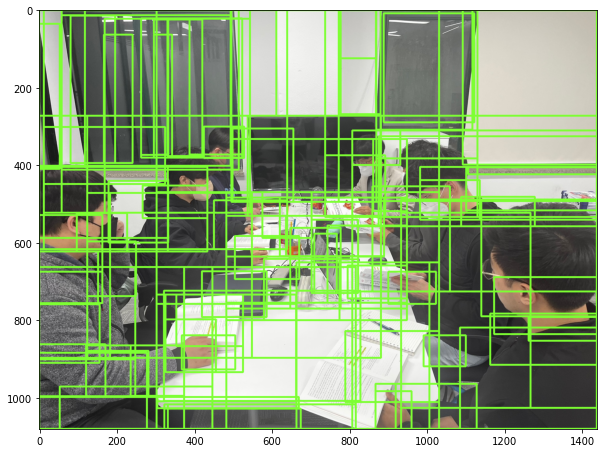

In [52]:
# opencv의 rectangle()을 이용하여 Bounding Box 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box컬러색, 두께등을 인자로 입력하면 원본 이미지에 box를 그려줌. 

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy() 
for rect in cand_rects:
    
    left = rect[0] # 좌상단 좌표
    top = rect[1] # 우하단 좌표
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=3)
    
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb_copy)
plt.show()

### Bounding box의 크기가 큰 후보만 추출

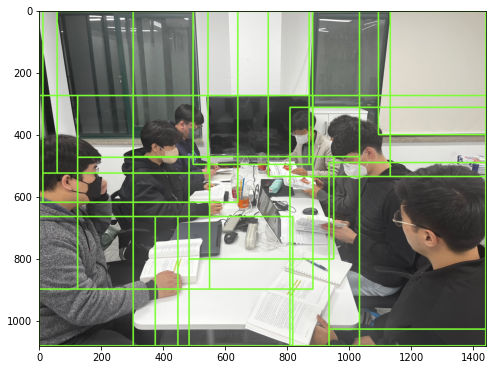

In [53]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 80000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=4)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

### IOU 구하기
  - 입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성

In [54]:
import numpy as np 

def compute_iou(cand_box, gt_box):

    # 겹치는 영역의 좌상단 x,y좌표와 우하단 x,y좌표 설정 (intersection 영역)
    x1 = np.maximum(cand_box[0], gt_box[0]) 
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    # 겹치는 영역(intersection 영역)의 너비 계산
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1]) # 예측 영역 넓이
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1]) # 실측 영역 넓이
    union = cand_box_area + gt_box_area - intersection # 전체 넓이
    
    iou = intersection / union # 개별 Box가 서로 겹치는 영역 / 전체 Box의 합집합 영역
    return iou

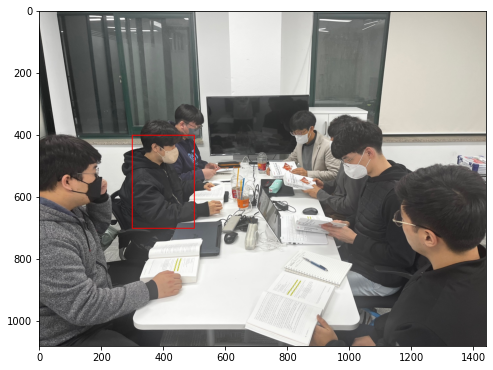

In [55]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 실제 box(Ground Truth)의 좌표를 아래와 같다고 가정. 
gt_box = [300, 400, 500, 700]


img = cv2.imread('./data/meeting.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0 , 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [56]:
import selectivesearch

img = cv2.imread('./data/meeting.jpg')
img_rgb2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, regions = selectivesearch.selective_search(img_rgb2, scale=100, min_size=3000)

print(type(regions), len(regions))

<class 'list'> 199


In [57]:
[cand['rect'] for cand in regions]

[(0, 0, 120, 407),
 (58, 0, 436, 12),
 (478, 0, 41, 319),
 (505, 0, 114, 276),
 (605, 0, 264, 272),
 (777, 0, 104, 269),
 (869, 0, 257, 308),
 (869, 0, 262, 382),
 (1093, 0, 346, 396),
 (208, 6, 277, 397),
 (58, 7, 180, 390),
 (165, 13, 91, 374),
 (81, 14, 115, 380),
 (116, 15, 210, 397),
 (261, 21, 75, 352),
 (284, 21, 77, 368),
 (354, 22, 129, 337),
 (331, 24, 81, 326),
 (889, 25, 224, 264),
 (0, 35, 52, 366),
 (419, 49, 68, 280),
 (296, 63, 46, 306),
 (499, 233, 157, 273),
 (0, 269, 158, 182),
 (542, 271, 329, 148),
 (539, 275, 208, 115),
 (540, 278, 96, 124),
 (611, 280, 99, 78),
 (427, 288, 103, 85),
 (808, 310, 124, 95),
 (342, 330, 124, 86),
 (814, 332, 173, 185),
 (930, 332, 509, 160),
 (546, 337, 143, 89),
 (278, 353, 293, 155),
 (551, 371, 284, 142),
 (1107, 405, 332, 18),
 (0, 408, 200, 181),
 (131, 411, 203, 32),
 (230, 422, 283, 229),
 (1105, 424, 334, 10),
 (138, 432, 197, 163),
 (1104, 434, 335, 83),
 (980, 439, 157, 101),
 (852, 454, 211, 218),
 (267, 457, 124, 72),
 (6

In [58]:
cand_rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(cand_rects):
    # (xmin, ymin, w, h) -> (xmin, ymin, xmax, ymax)
    # 원래 좌상단(시작) x,y좌표와 너비, 높이로 구성됨 -> 이걸 좌상단 좌표와, 우하단좌표로 바꿔줌
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
     
    iou = compute_iou(cand_box, gt_box)
    print('index:', index, "iou:", iou)

index: 0 iou: 0.0
index: 1 iou: 0.0
index: 2 iou: 0.0
index: 3 iou: 0.0
index: 4 iou: 0.0
index: 5 iou: 0.0
index: 6 iou: 0.0
index: 7 iou: 0.0
index: 8 iou: 0.0
index: 9 iou: 0.0032759984416872276
index: 10 iou: 0.0
index: 11 iou: 0.0
index: 12 iou: 0.0
index: 13 iou: 0.0021809336073480685
index: 14 iou: 0.0
index: 15 iou: 0.0
index: 16 iou: 0.0
index: 17 iou: 0.0
index: 18 iou: 0.0
index: 19 iou: 0.0
index: 20 iou: 0.0
index: 21 iou: 0.0
index: 22 iou: 0.001031579971777529
index: 23 iou: 0.0
index: 24 iou: 0.0
index: 25 iou: 0.0
index: 26 iou: 0.0
index: 27 iou: 0.0
index: 28 iou: 0.0
index: 29 iou: 0.0
index: 30 iou: 0.028887594641817123
index: 31 iou: 0.0
index: 32 iou: 0.0
index: 33 iou: 0.0
index: 34 iou: 0.25771043369325297
index: 35 iou: 0.0
index: 36 iou: 0.0
index: 37 iou: 0.0
index: 38 iou: 0.016634050880626222
index: 39 iou: 0.5796954700216437
index: 40 iou: 0.0
index: 41 iou: 0.06602550748790594
index: 42 iou: 0.0
index: 43 iou: 0.0
index: 44 iou: 0.0
index: 45 iou: 0.1050

In [59]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 120, 407),
 (0, 0, 120, 407),
 (0, 0, 530, 451),
 (0, 0, 530, 451),
 (0, 0, 530, 451),
 (0, 0, 674, 1079),
 (0, 0, 674, 1079),
 (0, 0, 674, 1079),
 (0, 0, 822, 1079),
 (0, 0, 822, 1079),
 (0, 0, 1439, 1079),
 (0, 0, 1439, 1079),
 (0, 0, 1439, 1079),
 (0, 0, 1439, 1079),
 (0, 0, 1439, 1079),
 (0, 0, 1439, 1079),
 (0, 35, 52, 366),
 (0, 269, 158, 182),
 (0, 408, 200, 181),
 (0, 408, 227, 214),
 (0, 408, 590, 490),
 (0, 408, 674, 671),
 (0, 411, 335, 254),
 (0, 432, 335, 233),
 (0, 568, 163, 97),
 (0, 586, 264, 323),
 (0, 586, 264, 493),
 (0, 586, 264, 493),
 (0, 586, 264, 493),
 (0, 586, 264, 493),
 (0, 586, 364, 493),
 (0, 586, 674, 493),
 (0, 586, 674, 493),
 (0, 622, 169, 154),
 (0, 622, 169, 210),
 (0, 676, 128, 120),
 (0, 676, 141, 156),
 (0, 861, 171, 134),
 (0, 878, 239, 201),
 (19, 758, 122, 74),
 (52, 890, 622, 189),
 (58, 0, 436, 403),
 (58, 0, 436, 412),
 (58, 0, 436, 412),
 (58, 0, 472, 416),
 (58, 7, 180, 390),
 (81, 14, 115, 380),
 (99, 521, 128, 101),
 (116, 15, 21

img shape: (1080, 1440, 3)
index: 39 iou: 0.5796954700216437 rectangle: ((230, 422, 513, 651))


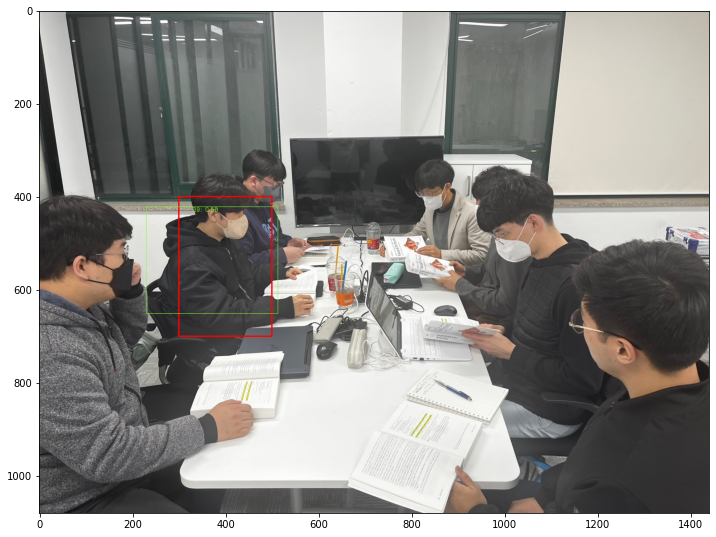

In [60]:
img = cv2.imread('./data/meeting.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [300, 400, 500, 700]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

for index, cand_box in enumerate(cand_rects):
    
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.5:
        print(f'index: {index} iou: {iou} rectangle: ({cand_box[0], cand_box[1], cand_box[2], cand_box[3]})')
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)
    
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()